## Boston Housing Data Analysis

 
 **Overview**

In this project we are going to be applying data science research method skills.

**Concepts covered:**
- Data Science methodology
- Statistical research methods
- Statistical programming in Python

**Dataset**

https://archive.ics.uci.edu/ml/machine-learning-databases/housing/

In [1]:
#import labraries and ignore warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#load dataset
from sklearn.datasets import load_boston
%matplotlib inline

#create variable for dataset
boston_data = load_boston()

In [2]:
#identify keys
print(boston_data.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [3]:
#review DESCR key
print(boston_data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
#load the boston data to dataframe
data = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)

In [5]:
#print dataframe
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
#add the target (MEDV - median home price)
data['MEDV'] = boston_data.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
#clean up titles
data_columns = ['CrimeRate', 'ZonedLandRatio', 'NRBizPerTown', 'NearRiver', 'NO2Levels', 'RoomsPerHome', 'BuiltPrior1940',
                'DisFromCenter', 'HighwayAccessible', 'PropTaxRate', 'PupilTeacherRatio', 'AfricanAmericanProp', 
                'PercentageLowerStatus', 'MedianHomePrice']
data.columns = data_columns
data.head()

,CrimeRate,ZonedLandRatio,NRBizPerTown,NearRiver,NO2Levels,RoomsPerHome,BuiltPrior1940,DisFromCenter,HighwayAccessible,PropTaxRate,PupilTeacherRatio,AfricanAmericanProp,PercentageLowerStatus,MedianHomePrice
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Basic Data Exploration

There are four commands which are used for basic data exploration in Python

- **head()**: This helps to see a few sample rows of the data
- **info()**: This provides the summarized information of the data
- **describe()**: This provides the descriptive statistical details of the data
- **nunique()**: This helps us to identify if a column is categorical or continuous


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CrimeRate              506 non-null    float64
 1   ZonedLandRatio         506 non-null    float64
 2   NRBizPerTown           506 non-null    float64
 3   NearRiver              506 non-null    float64
 4   NO2Levels              506 non-null    float64
 5   RoomsPerHome           506 non-null    float64
 6   BuiltPrior1940         506 non-null    float64
 7   DisFromCenter          506 non-null    float64
 8   HighwayAccessible      506 non-null    float64
 9   PropTaxRate            506 non-null    float64
 10  PupilTeacherRatio      506 non-null    float64
 11  AfricanAmericanProp    506 non-null    float64
 12  PercentageLowerStatus  506 non-null    float64
 13  MedianHomePrice        506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [9]:
data.describe()

,CrimeRate,ZonedLandRatio,NRBizPerTown,NearRiver,NO2Levels,RoomsPerHome,BuiltPrior1940,DisFromCenter,HighwayAccessible,PropTaxRate,PupilTeacherRatio,AfricanAmericanProp,PercentageLowerStatus,MedianHomePrice
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [10]:
#typically if the number of unique values are < 20, then the variable is likely to be a category otherwise continuous

data.nunique()

CrimeRate                504
ZonedLandRatio            26
NRBizPerTown              76
NearRiver                  2
NO2Levels                 81
RoomsPerHome             446
BuiltPrior1940           356
DisFromCenter            412
HighwayAccessible          9
PropTaxRate               66
PupilTeacherRatio         46
AfricanAmericanProp      357
PercentageLowerStatus    455
MedianHomePrice          229
dtype: int64

## Visual Data Exploration

Diving further into PercentageLowerStatus (LSTAT - % lower status of the population)

array([[<AxesSubplot:title={'center':'PercentageLowerStatus'}>]],
      dtype=object)

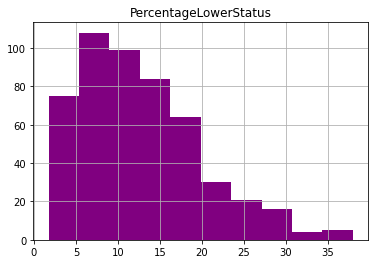

In [11]:
#plotting histogram

data.hist(['PercentageLowerStatus'], color='purple')

In [12]:
#compute the mean

ls_avg = data['PercentageLowerStatus'].mean()
ls_avg

12.653063241106723

In [13]:
#compute standard deviation

ls_std = data['PercentageLowerStatus'].std()
ls_std

7.141061511348571

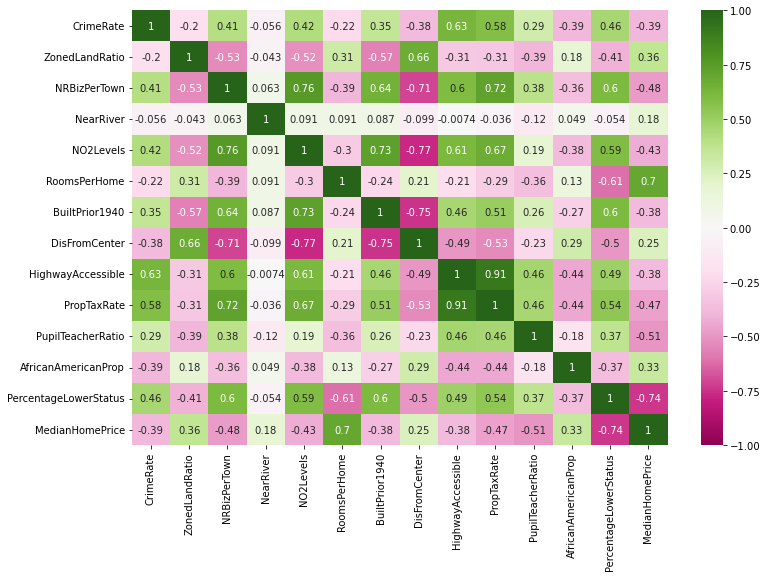

In [14]:
#correlation heatmap

plt.figure(figsize=(12, 8))

data_corr = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap='PiYG');


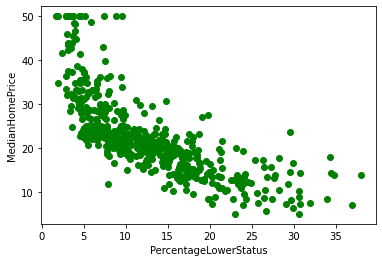

In [15]:
#scatterplot comparing MEDV and LSTAT

plt.scatter(x=data['PercentageLowerStatus'], y=data['MedianHomePrice'], color='green')
plt.xlabel('PercentageLowerStatus')
plt.ylabel('MedianHomePrice')
plt.show()

## Linear Regression

A predictive modeling technique used whenever there is a linear relation between the dependent and the independent variables

In [16]:
#divide the data into independent and dependent variables

x = pd.DataFrame(data['PercentageLowerStatus'])
y = pd.DataFrame(data['MedianHomePrice'])

In [17]:
#split the data into train and test sets
#80% to train model and 20% to test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [18]:
#shape of the train and test sets

print(x_train.shape)
print (x_test.shape)
print (y_train.shape)
print (y_test.shape)

(404, 1)
(102, 1)
(404, 1)
(102, 1)


In [19]:
#train the algorithm

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [20]:
#retrieve the intercept

print(regressor.intercept_)

[34.51296451]


In [21]:
#retrieve the slope

print(regressor.coef_)

[[-0.94058354]]


In [22]:
#determine the predicted values

y_pred = regressor.predict(x_test)
y_predict = pd.DataFrame(y_pred, columns=['Predicted'])
y_predict.head(10).round(1)

,Predicted
0,12.9
1,31.7
2,27.3
3,12.3
4,27.6
5,17.5
6,23.9
7,20.4
8,27.8
9,21.0


In [23]:
#look at actual values

y_test.head(10)

,MedianHomePrice
405,5.0
370,50.0
101,26.5
382,11.3
296,27.1
488,15.2
169,22.3
420,16.7
278,29.1
120,22.0


In [24]:
#evaluate the performance of algorithm

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.278753151763778
Mean Squared Error: 33.43432223960265
Root Mean Squared Error: 5.782241973456546


## Relationship Exploration

**Theory**: tracts that border the Charles River (NearRiver) will have higher median price (MedianHomePrice) than those that do not.

**Assumption(H0)**: There is NO relation between the given variables (i.e. The average(mean) values of the numeric Target variable is same as the categorical Predictor variable)

**ANOVA Test result**: Probability of H0 being true

Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable

In [25]:
#defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    #creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('ANOVA Results \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        #if the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])

In [26]:
#calling the function to check which categorical variable are correlated with target
CategoricalPredictorList=['NearRiver']
FunctionAnova(inpData=data, 
              TargetVariable='MedianHomePrice', 
              CategoricalPredictorList=CategoricalPredictorList)

ANOVA Results 

NearRiver is correlated with MedianHomePrice | P-Value: 7.390623170520815e-05


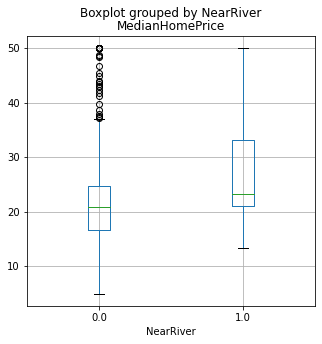

In [27]:
#box plots for continuous Target Variable "MedianHomePrice" and Categorical predictor
CategoricalColsList=['NearRiver']

#creating box plots for the categorical predictor against the Target Variable "MedianHomePrice"
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    data.boxplot(column='MedianHomePrice', by=PredictorCol, figsize=(5,5), vert=True)

In [28]:
#find confidence interval

import scipy.stats as st

#calculate the sample parameters
confidenceLevel = 0.90   #90% CI given
degrees_freedom = len(data['MedianHomePrice'])-1  #degree of freedom = sample size-1
sampleMean = np.mean(data['MedianHomePrice'])    #sample mean
sampleStandardError = st.sem(data['MedianHomePrice'])  #sample standard error

#create 90% confidence interval for the population mean
confidenceInterval = st.t.interval(alpha=confidenceLevel, df=degrees_freedom, loc=sampleMean, scale=sampleStandardError)

#print the 90% confidence interval for the population mean
print('The 90% confidence interval for the population mean :',confidenceInterval)

The 90% confidence interval for the population mean : (21.85905361953607, 23.206559028685326)


In [29]:
#find group size necessary for 80% power and effect size of 0.6

import statsmodels.stats.power as smp

power_analysis = smp.TTestIndPower()
sample_size = power_analysis.solve_power(effect_size=0.6, power=0.8, alpha=0.05)
sample_size

44.5857902590805

## Add new feature

In [30]:
import random

data["NearPark"] = data.apply(lambda data:random.randint(0,10), axis=1)
data.head()

,CrimeRate,ZonedLandRatio,NRBizPerTown,NearRiver,NO2Levels,RoomsPerHome,BuiltPrior1940,DisFromCenter,HighwayAccessible,PropTaxRate,PupilTeacherRatio,AfricanAmericanProp,PercentageLowerStatus,MedianHomePrice,NearPark
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,6
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,5
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,3
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,10
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,2


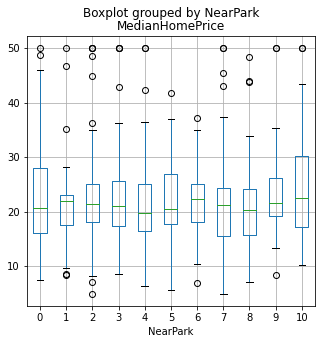

In [31]:
#box plot
CategoricalColsList=['NearPark']

#creating box plots for new feature against the "MedianHomePrice"
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    data.boxplot(column='MedianHomePrice', by=PredictorCol, figsize=(5,5), vert=True)

In [32]:
#defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    #creating an empty list of final selected predictor
    SelectedPredictors=[]
    
    print('ANOVA Results \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        #if the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])

In [33]:
#calling the function to check which categorical variable are correlated with target
CategoricalPredictorList=['NearPark']
FunctionAnova(inpData=data, 
              TargetVariable='MedianHomePrice', 
              CategoricalPredictorList=CategoricalPredictorList)

ANOVA Results 

NearPark is NOT correlated with MedianHomePrice | P-Value: 0.8257521034313684
